# Data formats
Data come in many forms and formats, depending on source and function.

## "Flat" text files
- .txt, .dat, .csv, .fasta, ...
- Often with a fixed format
    - Comma separated columns
    - Tabulator separated columns
    - Fixed width columns
    - Headers, subheaders
    - Sections with keywords

In [1]:
import pandas as pd
planets_DF = pd.read_csv('../../data/planets.csv')
planets_DF.head()

,planet,distance,diameter
0,Mercury,0.387 AU,4878 km
1,Venus,0.723 AU,12104 km
2,Earth,1.000 AU,12756 km
3,Mars,1.524 AU,6787 km
4,Jupiter,5.203 AU,142796 km


In [2]:
# Using planets_DF as input, remove " AU" from the "distance" column and convert it to a float
planets_DF['distance'] = planets_DF['distance'].str.replace(' AU', '').astype(float)
print(planets_DF.dtypes)
planets_DF.head()

planet       object
distance    float64
diameter     object
dtype: object


,planet,distance,diameter
0,Mercury,0.387,4878 km
1,Venus,0.723,12104 km
2,Earth,1.000,12756 km
3,Mars,1.524,6787 km
4,Jupiter,5.203,142796 km


### Plotting directly with Pandas
Instead of converting data to NumPy arrays and plotting, it is possible to plot directly from Pandas with [special plot commands](https://pandas.pydata.org/docs/reference/plotting.html) and [.plot.xxx()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

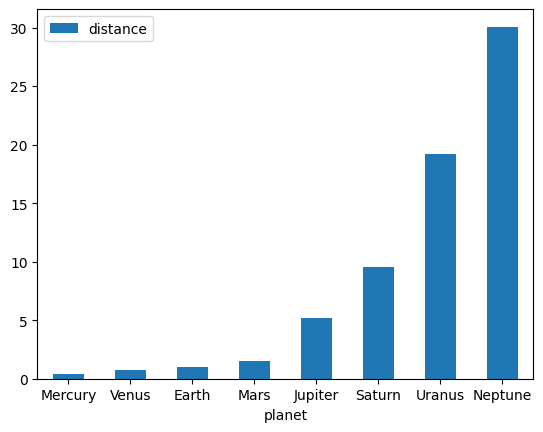

In [3]:
# Bar plot
# pd.options.plotting.backend = "matplotlib"
import matplotlib.pyplot as plt
planets_DF.plot.bar(x='planet', y='distance', rot=0)
plt.show()
# Try: color, rot, add more with plt.xxx()

### Exercise
- Plot the planets as circles instead of bars.
- Use the diameter of the planet to adjust the circle size. 

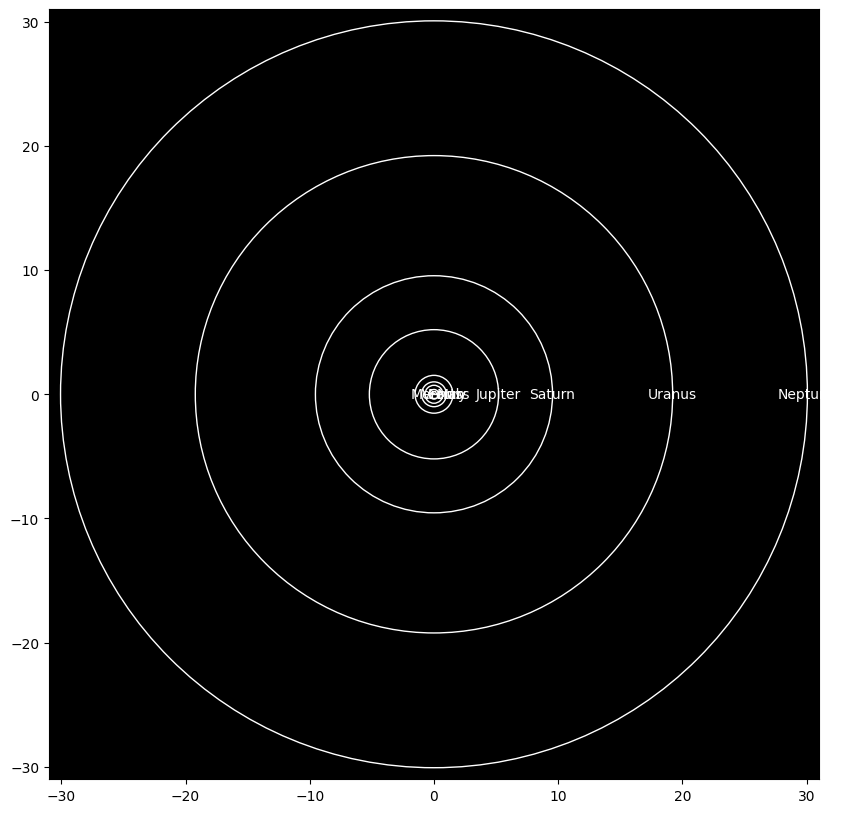

In [4]:
# Plot concentric ellipses for each planet where the size of the ellipse is proportional to 
# the planet's distance. Add planet names to the plot. Let the xlim and ylim extend from -31 to 31.
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(-31, 31)
ax.set_ylim(-31, 31)
ax.set_aspect('equal')
ax.set_facecolor('black')
for i in range(len(planets_DF)):
    ax.add_artist(plt.Circle((0,0), planets_DF['distance'][i], color='white', fill=False))
    ax.text(planets_DF['distance'][i], 0, planets_DF['planet'][i], color='white', ha='center', va='center')
plt.show()

## Excel files
Look at the Budget.xlsx file in the _data_ folder to justify the choice of import below.  
Should this be adjusted?  
  
[pd.read_excel()](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)

In [5]:
Budget = pd.read_excel('../../data/Budget.xlsx', sheet_name='2019', skiprows=2, index_col=0)
Budget

,1,2,3,4,5,6,7,8,9,10,11,12,Unnamed: 13
SalespersonID,,,,,,,,,,,,,
102,NaN,NaN,54.728491,8.053198e+02,1010.005526,NaN,1572.864176,196.077202,1896.777586,1430.463445,347.092894,723.918675,8.037248e+03
125,9016.031000,12635.710568,3975.959267,3.541869e+04,67254.905958,108270.212920,129885.185350,51801.187615,80833.313215,14351.065997,99034.421805,5946.076427,6.184228e+05
144,9870.923721,8537.674024,34467.719310,1.314835e+05,63478.807310,80332.088219,8950.845553,51091.397573,28463.939431,136104.694978,29076.741297,35033.416700,6.168917e+05
183,1394.216707,6598.171435,15397.847623,2.877323e+04,6530.927321,158828.572729,66426.139653,29403.035538,139983.518128,231592.365267,20132.676098,17248.364886,7.223091e+05
194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,2270.020511,12633.225198,7889.580041,2.465794e+03,199521.467124,6375.290655,24857.201539,193086.944649,66161.225155,225389.414595,53963.213693,37316.866234,8.319302e+05
215,5347.775816,98045.092946,14818.451817,5.493729e+05,323788.746583,122600.920552,79347.415036,353588.777730,37104.061797,41614.097652,233643.059453,583835.349542,2.443107e+06
265,1995.803045,2903.113376,16911.287170,2.858913e+05,143236.464661,14227.073545,403624.400847,76606.898096,11670.773263,153295.074262,202455.468961,41727.065582,1.354545e+06
285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Remove redundant row and column (sums)
Budget = Budget.iloc[:12, :12]
# Exchange NaN values with 0
Budget.replace(np.NAN, 0, inplace=True)

In [7]:
Budget

,1,2,3,4,5,6,7,8,9,10,11,12
SalespersonID,,,,,,,,,,,,
102,0.000000,0.000000,54.728491,805.319842,1010.005526,0.000000,1572.864176,196.077202,1896.777586,1430.463445,347.092894,723.918675
125,9016.031000,12635.710568,3975.959267,35418.687607,67254.905958,108270.212920,129885.185350,51801.187615,80833.313215,14351.065997,99034.421805,5946.076427
144,9870.923721,8537.674024,34467.719310,131483.460122,63478.807310,80332.088219,8950.845553,51091.397573,28463.939431,136104.694978,29076.741297,35033.416700
183,1394.216707,6598.171435,15397.847623,28773.228192,6530.927321,158828.572729,66426.139653,29403.035538,139983.518128,231592.365267,20132.676098,17248.364886
194,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
196,2270.020511,12633.225198,7889.580041,2465.793773,199521.467124,6375.290655,24857.201539,193086.944649,66161.225155,225389.414595,53963.213693,37316.866234
215,5347.775816,98045.092946,14818.451817,549372.866029,323788.746583,122600.920552,79347.415036,353588.777730,37104.061797,41614.097652,233643.059453,583835.349542
265,1995.803045,2903.113376,16911.287170,285891.263738,143236.464661,14227.073545,403624.400847,76606.898096,11670.773263,153295.074262,202455.468961,41727.065582
285,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


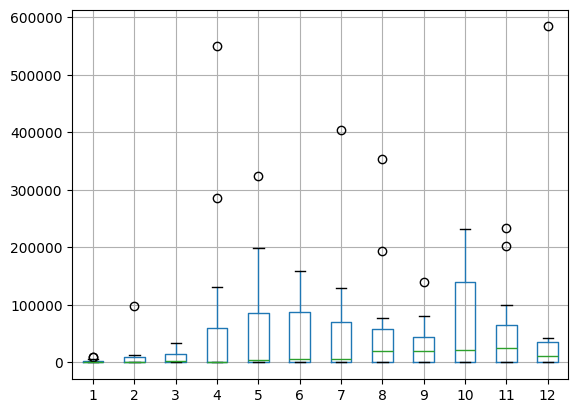

In [8]:
# Plot monthly budget as boxplot
Budget.boxplot()
plt.show()

### Pandas plotting with different backend
It is possible to exchange the _matplotlib_ backend in _Pandas_ with something else, e.g., the more interactive [_Plotly_](https://plotly.com/python/pandas-backend/). This may not be a full replacement.

In [9]:
pd.options.plotting.backend = "plotly"
fig = Budget.boxplot()
fig.show() # Exchanged plt.show() with fig.show() to avoid mixing matplotlib and plotly

## Other proprietary formats
- Many formats are vendor specific and only accessible because of backward engineering or similar. These are just a handful of such examples:
    - [MATLAB, NetCDF, Harwell-Boeing](https://docs.scipy.org/doc/scipy/reference/io.html) (SciPy.io)
    - Some chemical analytical instruments, e.g., [Bruker Opus format](https://github.com/qedsoftware/brukeropusreader), [Perkin Elmer IR](https://specio.readthedocs.io/en/stable/auto_examples/reader/plot_read_sp.html)
    - [GNSS](https://github.com/GNSSpy-Project/gnsspy)

## Media files
- Most image formats and many video formats are more or less directly readable using the [Pillow](https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html) or or PIL libraries.
- Medical imaging formats have some Python support, e.g., the [DICOM format](https://pydicom.github.io/)
- Sound files can be opened using [pySoundFile](https://pysoundfile.readthedocs.io/en/latest/), [librosa](https://github.com/librosa/librosa) or similar.

## JSON - JavaScript Object Notation
- Originally part of the 1999 JavaScript standard.
- Popular format for data storage and transfer, supported by a large range of programming languages.
- Text-based with fixed formatting but highly flexible structure and contents.
- [Basics](https://www.json.org/):
    - a _string_ has limitations/functionality with regard to backslashes \, otherwise plain text.
    - a _number_ is limited to integers, decimal numbers and scientific (float) numbers.
    - a _value_ can be a string, number, object, array, true, false, or null.
    - an _object_ is enclosed by curly brackets {} and contains (comma separated) _string : value_ pairs.
    - an _array_ is enclosed by brackets [] and contains (comma separated) _values_.
    - The JSON object is an unordered set.
    - Nesting is frequently used.

In [10]:
# Simplest? JSON object
import json
my_string = "banana"
my_string_as_json = json.dumps(my_string)
my_string_as_json

'"banana"'

In [11]:
# Check validity of JSON object (exception thrown if not valid)
json.loads(my_string_as_json)

'banana'

In [12]:
# An object, quite similar to a Python dictionary
my_object = {"fruit" : "banana", "color" : "yellow" }
my_object_as_json = json.dumps(my_object)
my_object_as_json

'{"fruit": "banana", "color": "yellow"}'

In [13]:
# Check validity of JSON object (exception thrown if not valid)
json.loads(my_object_as_json)

{'fruit': 'banana', 'color': 'yellow'}

In [14]:
my_object_as_dict = json.loads(my_object_as_json)
my_object_as_dict.keys()

dict_keys(['fruit', 'color'])

### JSON variants
- Though JSON itself is highly flexible, standardisation can ease implementation and transferability.
- [JSON-stat](https://jsonstat.com/) is a format adoptet by, e.g., [Statistics Norway](https://ssb.no) and [Eurostat](https://ec.europa.eu/eurostat).
    - [Standard libraries](https://json-stat.org/tools/) for handling data.
    - Especially useful for tabular data.
    - _json-stat2_ is the newest standard as of 2023.

In [15]:
# Read text file containing JSON object
import json
with open('../../data/traffic_accidents.txt') as f:
    json_string = f.read()
json_object = json.loads(json_string)
json_object

{'class': 'dataset',
 'label': '06794: Persons killed or injured in road traffic accidents, by degree of damage, sex, group of road user, contents and month',
 'source': 'Statistics Norway',
 'updated': '2023-08-18T06:00:00Z',
 'id': ['Skadegrad', 'Kjonn', 'Trafikkantgruppe', 'ContentsCode', 'Tid'],
 'size': [6, 2, 8, 1, 295],
 'dimension': {'Skadegrad': {'extension': {'show': 'value'},
   'label': 'degree of damage',
   'category': {'index': {'01': 0,
     '20': 1,
     '02': 2,
     '03': 3,
     '04': 4,
     '05': 5},
    'label': {'01': 'Killed',
     '20': 'All injured',
     '02': 'Dangerously injured',
     '03': 'Seriously injured',
     '04': 'Slightly injured',
     '05': 'Degree of injury unspecified'}}},
  'Kjonn': {'extension': {'show': 'value'},
   'label': 'sex',
   'category': {'index': {'1': 0, '2': 1},
    'label': {'1': 'Males', '2': 'Females'}},
   'link': {'describedby': [{'extension': {'Kjonn': 'urn:ssb:classification:klass:2'}}]}},
  'Trafikkantgruppe': {'extens

In [16]:
# Convert json_string to a JSON-stat object and then to a Pandas dataframe
from pyjstat import pyjstat
dataset = pyjstat.Dataset.read(json_string)
df = dataset.write('dataframe')
print(df.shape)
df.head()

(28320, 6)


,degree of damage,sex,group of road user,contents,month,value
0,Killed,Males,Drivers of car,Persons killed or injured,1999M01,8
1,Killed,Males,Drivers of car,Persons killed or injured,1999M02,6
2,Killed,Males,Drivers of car,Persons killed or injured,1999M03,5
3,Killed,Males,Drivers of car,Persons killed or injured,1999M04,9
4,Killed,Males,Drivers of car,Persons killed or injured,1999M05,12


## Exercise
We want to make a family tree consisting of child-parent JSON objects.  
Create a JSON list which contains two objects of equal structure (i.e., same nesting and _names_).  
Each object should contain a _name : value_ pair with the child name and a list of parents (_name : value_ pairs).
  
__Think__: 
- Are there alternative ways to code this? (hint: unique dictionary keys)
- If this JSON object was to be parsed for printing, inclusion in a database or other, are there exceptions one would have to consider?

## Extensible Markup Language (XML)
- Defined by the World Wide Web Consortium in 1998 (v1.0); current version from 2006 (v1.1, 2nd edition).
- Uses tags like HTML code, but much more flexible.
- Hundreds of document formats, several industry data standards and communication protocols, web page formats etc. are based on XML.
- As with JSON, there are many standardised formats defined using the base rules of XML.
    - More overhead in the file format, less readable, needs parser, more standardised, overlapping use in data transfer.
- Accepts most of the UTF-8 encoding (see below) including Chinese, Armenian, Cyrillic.

In [17]:
''' A valid XML file
<?xml version="1.0" encoding="UTF-8"?>
<俄语 լեզու="ռուսերեն">данные</俄语>
'''

' A valid XML file\n<?xml version="1.0" encoding="UTF-8"?>\n<俄语 լեզու="ռուսերեն">данные</俄语>\n'

In [18]:
# Equivalent JSON and XML documents
''' 
{"guests":[
  { "firstName":"John", "lastName":"Doe" },
  { "firstName":"María", "lastName":"García" },
  { "firstName":"Nikki", "lastName":"Wolf" }
]}

<guests>
  <guest>
    <firstName>John</firstName> <lastName>Doe</lastName>
  </guest>
  <guest>
    <firstName>María</firstName> <lastName>García</lastName>
  </guest>
  <guest>
    <firstName>Nikki</firstName> <lastName>Wolf</lastName>
  </guest>
</guests>
'''

' \n{"guests":[\n  { "firstName":"John", "lastName":"Doe" },\n  { "firstName":"María", "lastName":"García" },\n  { "firstName":"Nikki", "lastName":"Wolf" }\n]}\n\n<guests>\n  <guest>\n    <firstName>John</firstName> <lastName>Doe</lastName>\n  </guest>\n  <guest>\n    <firstName>María</firstName> <lastName>García</lastName>\n  </guest>\n  <guest>\n    <firstName>Nikki</firstName> <lastName>Wolf</lastName>\n  </guest>\n</guests>\n'

## Large data
- Real data can be exeedingly large; gigabytes, terabytes, ...
- Pandas takes you only part of the way.
- [Modin](https://modin.readthedocs.io) is an example of a simple Pandas replacement that scales much further (>1TB).
    - Choose backend: Ray, Dask, Unidist, and use _import modin.pandas as pd_
- [PySpark](https://spark.apache.org/docs/latest/api/python/index.html) with [Apache Spark](https://spark.apache.org/) takes this to a distributed level but also demands more installation and configuration.
    - We will test [Spark in conjunction with a database](../2_Databases/4_Spark.ipynb) later.

### HDF5
- Data container for large and/or heterogeneous data.
- Appears as a single file on a computer.
- Can be accessed and browsed without loading/unpacking its contents.
- Can group objects together, e.g., measurements and metadata.
- Data can be accessed through different views that require different relations or hierachies.
- Often used quite simply with data, models, and results in a single file.
- Resembles a flexible NumPy array.

## Encoding
- Most modern data storage use [UTF-8](https://en.wikipedia.org/wiki/UTF-8) encoding
    - Universal Coded Character Set Transformation Format - 8-bit, or just Unicode Transformation Format.
    - One to four 8-bit code units enabling 1 112 064 character codes.
    - JSON are among formats one assumes are UTF-8 encoded.
- However, there are many standards, so no guarantees are given.
    - ASCII, WINDOWS-1252 (Nordic), ISO-88xx-y, etc. may need special treatment or translation, especially if different connected apps or services have their own basic assumptions.
    - Old data files and vendor specific file version are most likely to be problematic.

## Resources
- [json.org](https://www.json.org/)
- [YouTube: Learn JSON in 10 minutes](https://youtu.be/iiADhChRriM) (12m:00s)
- [Pandas documentation: special plot commands](https://pandas.pydata.org/docs/reference/plotting.html)
- [Pandas documentation: .plot.xxx()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
- [YouTube: An Introduction to HDF5](https://youtu.be/S74Kc8QYDac) (10m:23s) (full course available)
- [The difference between JSON and XML](https://aws.amazon.com/compare/the-difference-between-json-xml/)